### EDA

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

#### Lectura de los datos 

In [2]:
# Lectura de los datos a partir de archivo excel suministrado
df_hechos = pd.read_excel('./dataset/homicidios.xlsx', sheet_name='HECHOS', header=0)
print(df_hechos.columns)


Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')


In [3]:
# Lectura de los datos a partir de archivo excel suministrado
df_victimas = pd.read_excel('./dataset/homicidios.xlsx', sheet_name='VICTIMAS', header=0)
print(df_victimas.head(1))
print(df_victimas.columns)

    ID_hecho      FECHA  AAAA  MM  DD        ROL VICTIMA       SEXO EDAD  \
0  2016-0001 2016-01-01  2016   1   1  CONDUCTOR    MOTO  MASCULINO   19   

   FECHA_FALLECIMIENTO  
0  2016-01-01 00:00:00  
Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')


In [4]:
print('tamaño de df_hechos: ', df_hechos.shape)
print('tamaño de df_victimas: ', df_victimas.shape)

tamaño de df_hechos:  (696, 21)
tamaño de df_victimas:  (717, 10)


#### Analisis preliminar de datos en archivo de Hechos

In [5]:
print(df_hechos.describe(include='all'))   # Se observan y validan los valores limites de cada uno de las columans del dataframe

               ID  N_VICTIMAS                          FECHA         AAAA  \
count         696  696.000000                            696   696.000000   
unique        696         NaN                            NaN          NaN   
top     2016-0001         NaN                            NaN          NaN   
freq            1         NaN                            NaN          NaN   
mean          NaN    1.030172  2018-09-14 05:12:24.827586048  2018.188218   
min           NaN    1.000000            2016-01-01 00:00:00  2016.000000   
25%           NaN    1.000000            2017-04-02 12:00:00  2017.000000   
50%           NaN    1.000000            2018-07-12 12:00:00  2018.000000   
75%           NaN    1.000000            2020-01-04 06:00:00  2020.000000   
max           NaN    3.000000            2021-12-30 00:00:00  2021.000000   
std           NaN    0.179393                            NaN     1.683754   

                MM          DD      HORA     HH  \
count   696.000000  696.

In [6]:
print(df_hechos['COMUNA'].value_counts())

COMUNA
1     90
4     76
9     73
8     65
7     60
3     45
15    44
13    40
12    37
14    35
11    32
10    29
2     25
5     22
6     21
0      2
Name: count, dtype: int64


### Comentario:  

Observaciones iniciales relacionadas con los rangos de valores de algunas de las variables e identificacion de valores anomalos:

- Rango de fechas de los datos:   2016-01-01    hasta     2021-12-30
- Años:       2016 a 2021
- Numero de victimas:   1 a 3
- Meses: 1 a 12
- Dia:   1 a 31
- Comuna:  0 a 15    (presenta 2 valores = 0, se tomarà en cuenta en el analisis posterior)

Inicialmente, no se observan valores anomalos o fuera de los rangos esperados para las variables indicadas

In [7]:
print(df_hechos.info())    # Se observan muy pocas columnas con valores nulos 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     696 non-null    object        
 1   N_VICTIMAS             696 non-null    int64         
 2   FECHA                  696 non-null    datetime64[ns]
 3   AAAA                   696 non-null    int64         
 4   MM                     696 non-null    int64         
 5   DD                     696 non-null    int64         
 6   HORA                   696 non-null    object        
 7   HH                     696 non-null    object        
 8   LUGAR_DEL_HECHO        696 non-null    object        
 9   TIPO_DE_CALLE          696 non-null    object        
 10  Calle                  695 non-null    object        
 11  Altura                 129 non-null    float64       
 12  Cruce                  525 non-null    object        
 13  Direc

#### Comentario:
- Se observan que las columnas Altura y Cruce tienen una gran cantidad de filas con datos nulos, la columna Dirección Normalizada solo presenta 8 filas con datos nulos y las demas columnas no presentan datos nulos

In [8]:
# Se verifican si hay filas duplicadas en dataframe df_hechos
print(df_hechos.duplicated().any()) 


False


#### Analisis preliminar de datos en archivo de Victimas

In [14]:
print(df_victimas.describe(include='all'))     # Se observan y validan los valores limites de cada uno de las columans del dataframe 

         ID_hecho                          FECHA         AAAA          MM  \
count         717                            717   717.000000  717.000000   
unique        696                            NaN          NaN         NaN   
top     2017-0035                            NaN          NaN         NaN   
freq            3                            NaN          NaN         NaN   
mean          NaN  2018-09-09 01:36:24.100418304  2018.174338    6.688982   
min           NaN            2016-01-01 00:00:00  2016.000000    1.000000   
25%           NaN            2017-04-01 00:00:00  2017.000000    4.000000   
50%           NaN            2018-07-07 00:00:00  2018.000000    7.000000   
75%           NaN            2019-12-18 00:00:00  2019.000000   10.000000   
max           NaN            2021-12-30 00:00:00  2021.000000   12.000000   
std           NaN                            NaN     1.672655    3.575140   

                DD        ROL VICTIMA       SEXO EDAD FECHA_FALLECIMIENTO  

### Comentario:  

Observaciones iniciales relacionadas con los rangos de valores de algunas de las variables e identificacion de valores anomalos:

- Rango de fechas de los datos:   2016-01-01    hasta     2021-12-30
- Años:       2016 a 2021
- Meses: 1 a 12
- Dia:   1 a 31

Inicialmente, no se observan valores anomalos o fuera de los rangos esperados para las variables indicadas

In [16]:
print(df_victimas.info())      # Se observa que noy hay valores nulos en las columnas del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  717 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 56.1+ KB
None


#### Comentario:
- Se observa que ninguna columna del dataframe presenta datos nulos

In [119]:
# Se verifican si hay filas duplicadas en dataframe df_victimas y en efecto no hay
print(df_victimas.duplicated().any()) 


False


#### Merge de los dos archivos de datos y analisis preliminar de los datos  

In [9]:
# Se realiza el merge entre los dos dataframe a partir de las columnas ID y ID_hecho

df_victimas.rename(columns={'ID_hecho': 'ID'}, inplace=True )

columnas_df_victimas = ['ID', 'ROL', 'SEXO', 'EDAD', 'FECHA_FALLECIMIENTO']

df_merged = pd.merge(df_hechos, df_victimas[columnas_df_victimas], on='ID', how='outer')
print(df_merged.columns)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO'],
      dtype='object')


In [10]:
print(df_merged.shape)

(717, 25)


In [11]:
print(df_merged.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     717 non-null    object        
 1   N_VICTIMAS             717 non-null    int64         
 2   FECHA                  717 non-null    datetime64[ns]
 3   AAAA                   717 non-null    int64         
 4   MM                     717 non-null    int64         
 5   DD                     717 non-null    int64         
 6   HORA                   717 non-null    object        
 7   HH                     717 non-null    object        
 8   LUGAR_DEL_HECHO        717 non-null    object        
 9   TIPO_DE_CALLE          717 non-null    object        
 10  Calle                  716 non-null    object        
 11  Altura                 133 non-null    float64       
 12  Cruce                  540 non-null    object        
 13  Direc

In [12]:
print(df_merged[df_merged['ID'] == '2016-0041'])       # Verificacion del merge para una fecha en especifico 

           ID  N_VICTIMAS      FECHA  AAAA  MM  DD      HORA  HH  \
29  2016-0041           2 2016-03-29  2016   3  29  11:00:00  11   
30  2016-0041           2 2016-03-29  2016   3  29  11:00:00  11   

                   LUGAR_DEL_HECHO TIPO_DE_CALLE  ...  \
29  AV DIRECTORIO Y RIVERA INDARTE       AVENIDA  ...   
30  AV DIRECTORIO Y RIVERA INDARTE       AVENIDA  ...   

                                 XY (CABA)         pos x         pos y  \
29  Point (100232.38564985 99530.25843190)  -58.46076550  -34.63350444   
30  Point (100232.38564985 99530.25843190)  -58.46076550  -34.63350444   

   PARTICIPANTES  VICTIMA ACUSADO                   ROL       SEXO EDAD  \
29   MOTO-CARGAS     MOTO  CARGAS             CONDUCTOR  MASCULINO   54   
30   MOTO-CARGAS     MOTO  CARGAS  PASAJERO_ACOMPAÑANTE  MASCULINO   SD   

    FECHA_FALLECIMIENTO  
29  2016-03-29 00:00:00  
30  2016-03-30 00:00:00  

[2 rows x 25 columns]


In [13]:
# Se obtiene la diferencia en dias entre la fecha del hecho y la fecha de fallecimiento para validacion y analisis posterior

# Covertimos las columnas en fechas
df_merged['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_merged['FECHA_FALLECIMIENTO'], errors='coerce')
df_merged['FECHA_FALLECIMIENTO'] = df_merged['FECHA_FALLECIMIENTO'].dt.date

df_merged['FECHA'] = pd.to_datetime(df_merged['FECHA'], errors='coerce')
df_merged['FECHA'] = df_merged['FECHA'].dt.date

# Filtramos para excluir los valores nulos 
df_clean = df_merged.dropna(subset=['FECHA_FALLECIMIENTO'])
df_merged['DIAS_FALLECIMIENTO'] = np.nan

#Se calcula la diferencia y se expresa en dias
df_merged.loc[df_clean.index, 'DIAS_FALLECIMIENTO'] = (df_clean['FECHA_FALLECIMIENTO'] - df_clean['FECHA']) / np.timedelta64(1, 'D')

In [14]:
print(df_merged['FECHA_FALLECIMIENTO'].isnull().sum())
print(df_merged['FECHA'].isnull().sum())

68
0


In [15]:
print(df_merged['DIAS_FALLECIMIENTO'].value_counts())

DIAS_FALLECIMIENTO
0.0     496
1.0      55
2.0      17
3.0      13
4.0      13
5.0       8
6.0       5
7.0       5
8.0       4
9.0       4
10.0      4
24.0      3
13.0      3
11.0      3
20.0      2
16.0      2
19.0      2
14.0      2
25.0      1
17.0      1
27.0      1
12.0      1
18.0      1
15.0      1
22.0      1
21.0      1
Name: count, dtype: int64


#### Comentario:
- Se observa que la mayoria de los fallecimientos (69%) acurren el mismo dia del siniestro y el 31% ocurren luego del primer dia 
- Se observan que no hay valores anomalos o negativos lo que constituyen una validacion de consistencia en las fechas en las columnas FECHA_FALLECIMIENTO y FECHA 

In [16]:
# Agregamos el dia de la semana al dataframe (0 para lunes, 1 para martes, ..., 6 para domingo) para validacion y analisis posterior
def dia_de_semana(fecha):
    return fecha.weekday()

df_merged['DIA_SEMANA'] = df_merged['FECHA'].apply(dia_de_semana)

print(df_merged['DIA_SEMANA'].value_counts())

DIA_SEMANA
5    107
0    107
6    105
4    102
1    101
2     99
3     96
Name: count, dtype: int64


In [12]:
pd.set_option('display.max_rows', None)

In [17]:
# Analisis de la columna EDAD
print(df_merged['EDAD'].value_counts())    # se observa que hay 53 filas (7% del total de filas) sin el dato de Edad registrado

EDAD
SD    53
30    28
29    24
23    24
27    20
      ..
11     1
13     1
85     1
7      1
88     1
Name: count, Length: 86, dtype: int64


In [18]:
df_filtrado = df_merged[df_merged['EDAD'] != 'SD']
cantidad_valores_20_32 = df_filtrado[(df_filtrado['EDAD'] >= 20) & (df_filtrado['EDAD'] <= 32)].shape[0]
print(cantidad_valores_20_32)


236


#### Comentario:
- Se observa una frecuencia de 33% entre las edades de 20 y 32 años  

In [87]:
print(df_merged.columns)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'DIAS_FALLECIMIENTO'],
      dtype='object')


In [88]:
# Analisis preliminar de solo las variables numericas
df_merged_numerico=df_merged[['ID', 'FECHA', 'N_VICTIMAS', 'AAAA', 'MM', 'DD', 'HH', 'COMUNA', 'EDAD', 'DIAS_FALLECIMIENTO']] 
print(df_merged_numerico.head(1))

          ID       FECHA  N_VICTIMAS  AAAA  MM  DD  HH  COMUNA  EDAD  \
0  2016-0001  2016-01-01           1  2016   1   1   4       8  19.0   

   DIAS_FALLECIMIENTO  
0                 0.0  


In [ ]:
# Determinamos filas numericas con valores de SD para depurar y posterior analisis
# print(df_merged_numerico['HH'].value_counts()['SD'])
# print(df_merged_numerico['EDAD'].value_counts()['SD'])

In [95]:
print(df_merged_numerico['EDAD'].isnull().sum())
print(df_merged_numerico['DIAS_FALLECIMIENTO'].isnull().sum())

53
68


In [96]:
# Debido a que las filas con valores = SD o nulos son pocas se excluyen para el analisis preliminar
df_merged_numerico = df_merged_numerico.dropna(subset=['EDAD'])
df_merged_numerico = df_merged_numerico.dropna(subset=['DIAS_FALLECIMIENTO']) 

# Convertimos las variables en numero enteros
df_merged_numerico['HH'] = df_merged_numerico['HH'].astype('int64')
df_merged_numerico['EDAD'] = df_merged_numerico['EDAD'].astype('int64')

In [98]:
print(df_merged_numerico.info())

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 0 to 716
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  611 non-null    object 
 1   FECHA               611 non-null    object 
 2   N_VICTIMAS          611 non-null    int64  
 3   AAAA                611 non-null    int64  
 4   MM                  611 non-null    int64  
 5   DD                  611 non-null    int64  
 6   HH                  611 non-null    int64  
 7   COMUNA              611 non-null    int64  
 8   EDAD                611 non-null    int64  
 9   DIAS_FALLECIMIENTO  611 non-null    float64
dtypes: float64(1), int64(7), object(2)
memory usage: 52.5+ KB
None


In [99]:
print(df_merged_numerico.describe())

       N_VICTIMAS         AAAA          MM          DD          HH  \
count  611.000000   611.000000  611.000000  611.000000  611.000000   
mean     1.057283  2018.373159    6.563011   15.764321   11.528642   
std      0.252837     1.621030    3.593328    8.660071    6.619426   
min      1.000000  2016.000000    1.000000    1.000000    0.000000   
25%      1.000000  2017.000000    3.000000    9.000000    6.000000   
50%      1.000000  2018.000000    6.000000   16.000000   11.000000   
75%      1.000000  2020.000000   10.000000   23.000000   17.000000   
max      3.000000  2021.000000   12.000000   31.000000   23.000000   

           COMUNA        EDAD  DIAS_FALLECIMIENTO  
count  611.000000  611.000000          611.000000  
mean     7.394435   42.582651            1.314239  
std      4.417540   19.964665            3.810182  
min      1.000000    1.000000            0.000000  
25%      4.000000   27.000000            0.000000  
50%      8.000000   37.000000            0.000000  
75%  

### Comentario:  

Observaciones adicionales relacionadas con los rangos de valores de algunas de las variables e identificacion de valores anomalos:

- Hora:   0  a  23 
- Comuna: 1  a  15
- Edad:   1  a  95
- Dias de Fallecimiento:   0 a 27     (variables agregada al daframe para validacion y analisis posterior)

Inicialmente, no se observan valores anomalos o fuera de los rangos esperados para las variables indicadas

In [17]:
# Convertimos en mayusculas todas las columnas string
df_merged['LUGAR_DEL_HECHO'] = df_merged['LUGAR_DEL_HECHO'].str.upper()  
df_merged['TIPO_DE_CALLE'] = df_merged['TIPO_DE_CALLE'].str.upper()  
df_merged['Calle'] = df_merged['Calle'].str.upper()  
df_merged['Cruce'] = df_merged['Cruce'].str.upper()  
df_merged['Dirección Normalizada'] = df_merged['Dirección Normalizada'].str.upper()  

print(df_merged.head(1))

          ID  N_VICTIMAS       FECHA  AAAA  MM  DD      HORA HH  \
0  2016-0001           1  2016-01-01  2016   1   1  04:00:00  4   

                             LUGAR_DEL_HECHO TIPO_DE_CALLE  ...         pos y  \
0  AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ       AVENIDA  ...  -34.68757022   

   PARTICIPANTES VICTIMA ACUSADO        ROL       SEXO EDAD  \
0      MOTO-AUTO    MOTO    AUTO  CONDUCTOR  MASCULINO   19   

  FECHA_FALLECIMIENTO DIAS_FALLECIMIENTO DIA_SEMANA  
0          2016-01-01                0.0          4  

[1 rows x 27 columns]


#### Analisis de columnas SEXO

In [19]:
# Analisis adicionales de las columnas SEXO
print(df_merged['SEXO'].value_counts())     

SEXO
MASCULINO    545
FEMENINO     166
SD             6
Name: count, dtype: int64


##### Imputacion de valores de Sexo = SD con el imputador KNNImputer de Scikit-learn 

In [21]:
# Se genera columna que indica con un valor igual a 1 las filas que seran imputadas
df_merged['SEXO_MARK'] = df_merged['SEXO'].apply(lambda x: 1 if x == 'SD' else 0)

print(df_merged['SEXO_MARK'].value_counts())


SEXO_MARK
0    711
1      6
Name: count, dtype: int64


In [22]:
df_merged['SEXO_IMPUTADO'] = df_merged['SEXO']

# Codificar la columna de sexo a valores numéricos
encoder = LabelEncoder()
df_merged['Sexo_encoded'] = encoder.fit_transform(df_merged['SEXO_IMPUTADO'])

# Reemplazar 'SD' con NaN
df_merged.replace('SD', float('nan'), inplace=True)

# Importar KNNImputer y crear el objeto imputer
imputer = KNNImputer(n_neighbors=10) 

# Estimar los valores faltantes ('SD')
df_merged['Sexo_encoded'] = imputer.fit_transform(df_merged[['Sexo_encoded']])

# Asignar 'MASCULINO' o 'FEMENINO' a los valores imputados si están por encima de un umbral
umbral = 0.5  # Umbral para decidir si asignar 'MASCULINO' o 'FEMENINO'
df_merged.loc[df_merged['Sexo_encoded'] > umbral, 'SEXO_IMPUTADO'] = 'MASCULINO'
df_merged.loc[df_merged['Sexo_encoded'] <= umbral, 'SEXO_IMPUTADO'] = 'FEMENINO'

# Eliminar la columna codificada adicional
df_merged.drop(columns=['Sexo_encoded'], inplace=True)

print(df_merged['SEXO_IMPUTADO'].value_counts())     


SEXO_IMPUTADO
MASCULINO    551
FEMENINO     166
Name: count, dtype: int64


C:\Users\Diego\AppData\Local\Temp\ipykernel_19264\1623384382.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_merged.replace('SD', float('nan'), inplace=True)


In [38]:
print(df_merged[df_merged['SEXO_MARK'] == 1][['SEXO', 'SEXO_MARK','SEXO_IMPUTADO']])

    SEXO  SEXO_MARK SEXO_IMPUTADO
36   NaN          1     MASCULINO
39   NaN          1     MASCULINO
108  NaN          1     MASCULINO
121  NaN          1     MASCULINO
138  NaN          1     MASCULINO
141  NaN          1     MASCULINO


In [39]:
print (df_merged['SEXO'].describe())

count           711
unique            2
top       MASCULINO
freq            545
Name: SEXO, dtype: object


#### Analisis de columnas EDAD

In [149]:
# Se observan 6 valores = SD en la columana SEXO que representan menos del 1% de los datos por lo que inicialmente se eliminaran 
# estas filas solo para efectos del EDA preliminar
df_merged_eda = df_merged[df_merged['SEXO'] != 'SD']
print(df_merged_eda['SEXO'].value_counts())     

SEXO
MASCULINO    545
FEMENINO     166
Name: count, dtype: int64


In [ ]:
# Solo para poder graficar se eliminan inicialmente las filas con valores de SD en la columna de EDAD 
df_merged_eda_edad = df_merged_eda[df_merged_eda['EDAD'] != 'SD']
df_merged_eda_edad['EDAD'] = df_merged_eda_edad['EDAD'].astype('int64')


In [158]:
# Valores estadisticos basicos de la columna EDAD (sin los valores SD)

df_merged_eda_edad2 = df_merged_eda_edad[['EDAD']]

print (df_merged_eda_edad2.describe())

             EDAD
count  664.000000
mean    42.167169
std     19.788034
min      1.000000
25%     27.000000
50%     37.000000
75%     56.250000
max     95.000000


In [159]:
# Valores estadisticos basicos de la columna EDAD pero solo para el SEXO = MASCULINO
df_merged_eda_masculino = df_merged_eda_edad[df_merged_eda_edad['SEXO'] == 'MASCULINO']
df_merged_eda_masculino = df_merged_eda_masculino[['EDAD']]
df_merged_eda_masculino['EDAD'] = df_merged_eda_masculino['EDAD'].astype('int64')

print (df_merged_eda_masculino.describe())


             EDAD
count  509.000000
mean    39.550098
std     18.387987
min      1.000000
25%     26.000000
50%     35.000000
75%     49.000000
max     91.000000


In [165]:
print(df_merged_eda_masculino['EDAD'].value_counts())

EDAD
30    22
29    19
23    19
27    18
24    17
      ..
5      1
86     1
74     1
88     1
65     1
Name: count, Length: 77, dtype: int64


In [160]:
# Valores estadisticos basicos de la columna EDAD pero solo para el SEXO = FEMENINO
df_merged_eda_femenino = df_merged_eda_edad[df_merged_eda_edad['SEXO'] == 'FEMENINO']

df_merged_eda_femenino = df_merged_eda_femenino[['EDAD']]
df_merged_eda_femenino['EDAD'] = df_merged_eda_femenino['EDAD'].astype('int64')

print (df_merged_eda_femenino.describe())

             EDAD
count  155.000000
mean    50.761290
std     21.758737
min      7.000000
25%     30.000000
50%     53.000000
75%     70.000000
max     95.000000


In [168]:
print(df_merged_eda_femenino['EDAD'].value_counts())

EDAD
30    6
60    6
29    5
23    5
58    5
28    4
40    4
47    4
78    4
61    4
26    4
80    4
39    3
73    3
19    3
22    3
79    3
50    3
76    3
72    3
81    3
55    3
56    3
57    3
53    3
87    2
32    2
44    2
62    2
82    2
74    2
69    2
63    2
42    2
75    2
49    2
16    2
31    2
35    2
43    2
18    2
51    2
27    2
83    2
70    2
33    2
65    1
68    1
24    1
34    1
66    1
92    1
77    1
45    1
12    1
15    1
17    1
67    1
86    1
7     1
59    1
20    1
95    1
36    1
85    1
Name: count, dtype: int64


### Comentario:   
 
- Se observa una diferencia considerable entre el porcentaje de victimas de sexo MASCULINO (77%) y FEMENINO (23%)

- Tambien se nota que los valores estadisticos de EDAD difiere considerablemente para ambos sexos por lo que esto tendra que tomarse muy en cuenta para analisis posteriores

##### Imputacion de valores de Edad = SD con el imputador KNNImputer de Scikit-learn 

In [23]:
# Se genera columna que indica con un valor igual a 1 las filas que seran imputadas
df_merged['EDAD_MARK'] = 0
df_merged.loc[df_merged['EDAD'].isnull(), 'EDAD_MARK'] = 1 


print(df_merged['EDAD_MARK'].value_counts())

EDAD_MARK
0    664
1     53
Name: count, dtype: int64


In [41]:
print(df_merged['EDAD'].isnull().sum())


53


In [24]:
# Copiar la columna 'EDAD' para mantener el original intacto
df_merged['EDAD_IMPUTADA'] = df_merged['EDAD']

# Crear el objeto imputer
imputer_edad = KNNImputer(n_neighbors=50)

# Estimar los valores faltantes en 'EDAD'
df_merged['EDAD_IMPUTADA'] = imputer_edad.fit_transform(df_merged[['EDAD_IMPUTADA']])

# Covertir a entero
df_merged['EDAD_IMPUTADA'] = df_merged['EDAD_IMPUTADA'].round().astype(int)

print(df_merged['EDAD_IMPUTADA'].describe())

count    717.000000
mean      42.154812
std       19.041627
min        1.000000
25%       28.000000
50%       39.000000
75%       55.000000
max       95.000000
Name: EDAD_IMPUTADA, dtype: float64


In [25]:
print(df_merged[df_merged['SEXO'] == 'MASCULINO']['EDAD_IMPUTADA'].value_counts())

EDAD_IMPUTADA
42    41
30    22
23    19
29    19
27    18
      ..
5      1
86     1
74     1
88     1
65     1
Name: count, Length: 77, dtype: int64


In [26]:
print(df_merged[df_merged['SEXO'] == 'FEMENINO']['EDAD_IMPUTADA'].value_counts())

EDAD_IMPUTADA
42    13
30     6
60     6
29     5
23     5
      ..
45     1
17     1
67     1
59     1
15     1
Name: count, Length: 65, dtype: int64


#### Comentario:

- Se observa que se esta imputando con el valor del promedio, lo cual no se considera adecuado para el tipo analisis que se realiza donde la frecuencia de la edad real de las victimas es de gran importancia 
- Se realizara una imputacion manual discrimida por sexo y basada en una distribucion gaussiana para el Sexo Masculino y una distribucion uniforme entre el rango de valores con mayor frecuencia (mayor al 30%) determinado a partir del analisis preliminar de los datos realizado sin tomar en cuenta los datos nulos 

In [34]:
# Imputacion de valores para el SEXO MASCULINO
# Se toma el rango de valores EDAD de mayor frecuencia entre 20 y 32 (30%) y se asume una dsitribucion gaussiana

# Copiar la columna 'EDAD' para mantener el original intacto
df_merged['EDAD_IMPUTADA'] = df_merged['EDAD']

# Generar valores aleatorios con distribución gaussiana entre 20 y 32
valores_aleatorios = np.random.normal(loc=26, scale=4, size=df_merged[df_merged['SEXO_IMPUTADO'] == 'MASCULINO']['EDAD'].isnull().sum())

# Asegurarse de que los valores imputados estén dentro del rango de 20 a 30
valores_aleatorios = valores_aleatorios.astype(int)
valores_aleatorios = np.clip(valores_aleatorios, 18, 34)

# Asignar los valores aleatorios a los valores nulos en la columna 'EDAD' para 'MASCULINO'
df_merged.loc[(df_merged['EDAD'].isnull()) & (df_merged['SEXO_IMPUTADO'] == 'MASCULINO'), 'EDAD_IMPUTADA'] = np.round(valores_aleatorios)

print(df_merged[df_merged['SEXO_IMPUTADO'] == 'MASCULINO']['EDAD_IMPUTADA'].value_counts())

EDAD_IMPUTADA
30.0    24
29.0    24
27.0    21
23.0    21
21.0    21
        ..
11.0     1
77.0     1
13.0     1
79.0     1
65.0     1
Name: count, Length: 77, dtype: int64


In [35]:
print(df_merged['EDAD_IMPUTADA'].isnull().sum())

11


In [39]:
# Imputacion de valores para el SEXO FEMENINO
# Se toma el rango de valores EDAD de mayor frecuencia entre 21 y 80 y asumiendo una distribucion Uniforme 

# Generar valores aleatorios con distribución uniforme  entre 21 y 80
valores_aleatorios = np.random.uniform(low=21, high=75, size=df_merged[df_merged['SEXO_IMPUTADO'] == 'FEMENINO']['EDAD'].isnull().sum())

# Asegurarse de que los valores imputados estén dentro del rango de 21 a 80
valores_aleatorios = valores_aleatorios.astype(int)
valores_aleatorios = np.clip(valores_aleatorios, 21, 80)

# Asignar los valores aleatorios a los valores nulos en la columna 'EDAD' para 'MASCULINO'
df_merged.loc[(df_merged['EDAD'].isnull()) & (df_merged['SEXO_IMPUTADO'] == 'FEMENINO'), 'EDAD_IMPUTADA'] = np.round(valores_aleatorios)

df_merged['EDAD_IMPUTADA'] = df_merged['EDAD_IMPUTADA'].round().astype(int)

print(df_merged[df_merged['SEXO_IMPUTADO'] == 'FEMENINO']['EDAD_IMPUTADA'].value_counts())


EDAD_IMPUTADA
29    7
60    7
30    6
26    5
23    5
     ..
45    1
17    1
38    1
20    1
15    1
Name: count, Length: 67, dtype: int64


#### Analisis mediante graficos 
- Columna SEXO:

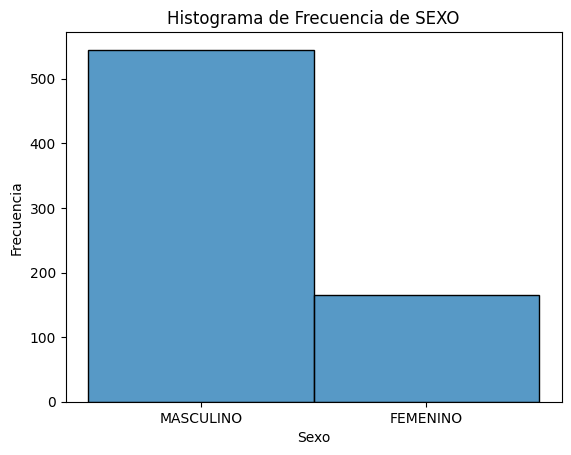

In [40]:
sns.histplot(df_merged['SEXO'], bins=2)
plt.title('Histograma de Frecuencia de SEXO')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.show()

#### Comentario: 
- Se corrobora el porcentaje de victimas de sexo MASCULINO (77%) y FEMENINO (23%)

#### Validacion de la Imputacion de valores en la columna de EDAD 

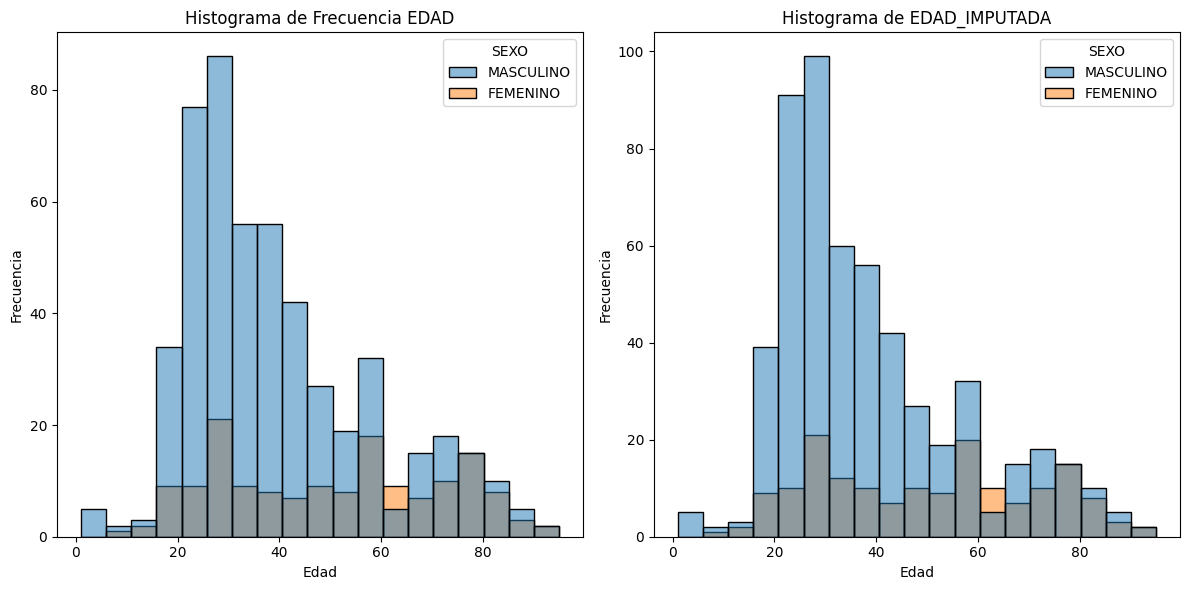

In [65]:
plt.figure(figsize=(12, 6))

# Histograma de la columna 'EDAD'
plt.subplot(1, 2, 1)
sns.histplot(data=df_merged, x='EDAD', hue='SEXO', binwidth=5, color='blue')
plt.title('Histograma de Frecuencia EDAD')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Histograma de la columna 'EDAD_IMPUTADA'
plt.subplot(1, 2, 2)
sns.histplot(data=df_merged, x='EDAD_IMPUTADA', hue='SEXO', binwidth=5, color='blue')
plt.title('Histograma de EDAD_IMPUTADA')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

#### Comentario: 
- Se confirma la simulitud del histograma de frecuencia obtenido con los datos de EDAD originales (con datos nulos) y el obtenido con los atos de EDAD con los datos imputados, lo que confirma lo apropiado de la metodologia empleada

- Se observa que para el sexo MASCULINO la EDAD con mayor cantidad de victimas se encuentran en el rango de 20 a 32 años 
- Se observa que para el sexo FEMENINO la EDAD con mayor cantidad de victimas se encuentran en el rango de 21 a 30 años y de 55 a 80 tambien es bastante frecuente

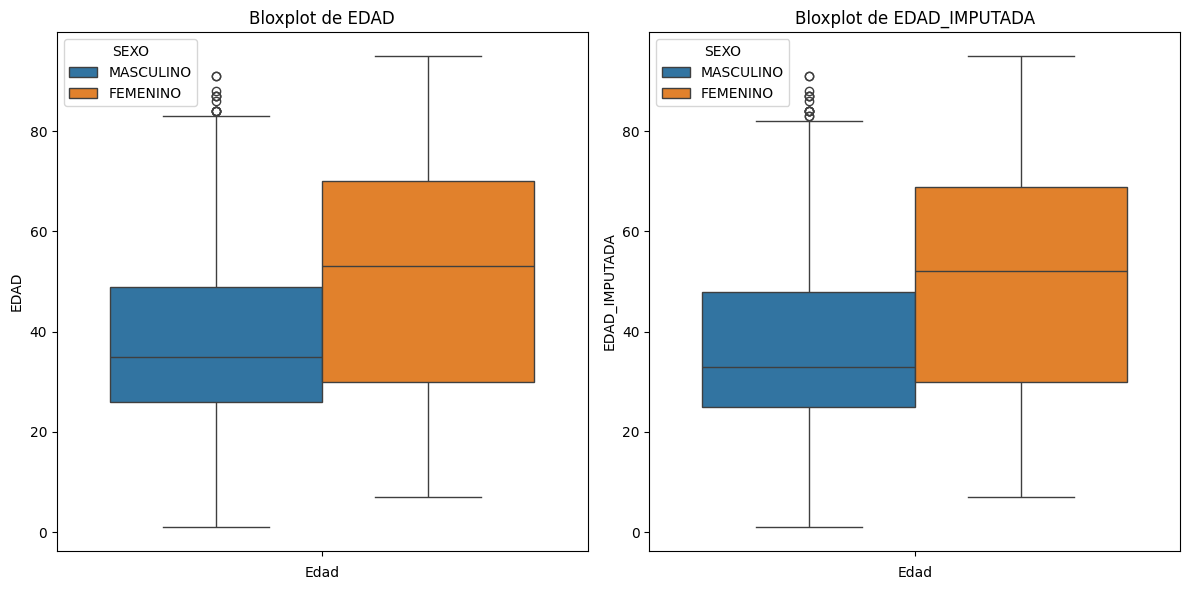

In [41]:
plt.figure(figsize=(12, 6))

# Boxplot de la columna 'EDAD'
plt.subplot(1, 2, 1)
sns.boxplot(data=df_merged, y='EDAD', hue='SEXO')
plt.title('Bloxplot de EDAD')
plt.xlabel('Edad')

# Boxplot de la columna 'EDAD_IMPUTADA'
plt.subplot(1, 2, 2)
sns.boxplot(data=df_merged, y='EDAD_IMPUTADA', hue='SEXO')
plt.title('Bloxplot de EDAD_IMPUTADA')
plt.xlabel('Edad')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

#### Comentario: 
- Se confirma la simulitud de los Boxplot obtenido con los datos de EDAD originales (con datos nulos) y el obtenido con los atos de EDAD con los datos imputados, lo que confirma lo apropiado de la metodologia empleada

#### Comentario:

- De acuerdo a los resultados obtenidos y al comportamiento deferenciado de los valores de EDAD para cada uno de los 2 valores en la variable SEXO se decidio sustituir los valores faltantes de EDAD (presentan valores de: SD) por los valores de la media del SEXO correspondiente

#### Analisis de la columna HH (Hora de Siniestro)

In [46]:
pd.reset_option('display.max_rows')

print(df_merged['HH'].value_counts()) 



HH
7.0     43
6.0     42
5.0     39
9.0     37
14.0    33
18.0    33
12.0    32
22.0    31
8.0     31
10.0    31
17.0    31
19.0    30
16.0    30
21.0    29
11.0    29
23.0    28
4.0     27
20.0    26
3.0     26
1.0     25
15.0    25
0.0     23
2.0     18
13.0    17
Name: count, dtype: int64


In [48]:
print(df_merged[df_merged['HH'] == 'SD'])

Empty DataFrame
Columns: [ID, N_VICTIMAS, FECHA, AAAA, MM, DD, HORA, HH, LUGAR_DEL_HECHO, TIPO_DE_CALLE, Calle, Altura, Cruce, Dirección Normalizada, COMUNA, XY (CABA), pos x, pos y, PARTICIPANTES, VICTIMA, ACUSADO, ROL, SEXO, EDAD, FECHA_FALLECIMIENTO, DIAS_FALLECIMIENTO, DIA_SEMANA, SEXO_MARK, SEXO_IMPUTADO, EDAD_MARK, EDAD_IMPUTADA]
Index: []

[0 rows x 31 columns]


In [53]:
# Se asignara el valor de HH = 7, que es el valor mas frecuente, a la unica fila que presenta HH='SD' y 'NaN'
df_merged.loc[df_merged['HH'] == 'SD', 'HH'] = 7

df_merged['HH'].fillna(7, inplace=True)

df_merged['HH'] = df_merged['HH'].round().astype(int)

print(df_merged['HH'].value_counts()) 

HH
7     44
6     42
5     39
9     37
14    33
18    33
12    32
22    31
8     31
10    31
17    31
19    30
16    30
21    29
11    29
23    28
4     27
20    26
3     26
1     25
15    25
0     23
2     18
13    17
Name: count, dtype: int64


C:\Users\Diego\AppData\Local\Temp\ipykernel_19264\2630415952.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['HH'].fillna(7, inplace=True)


In [54]:
print(df_merged.shape)

(717, 31)


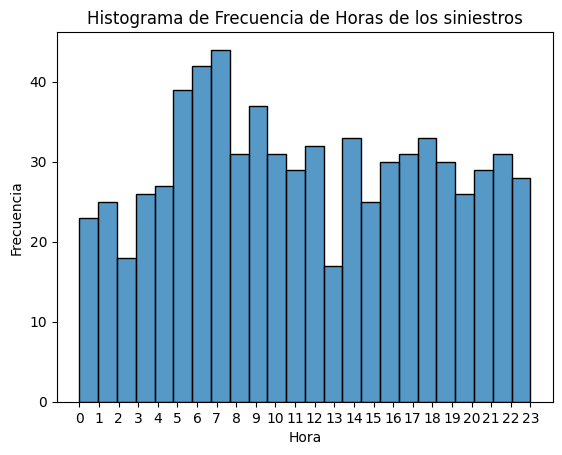

In [55]:
sns.histplot(data=df_merged, x='HH', bins=24)
plt.title('Histograma de Frecuencia de Horas de los siniestros')
plt.xlabel('Hora')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje x cada 2 unidades
plt.xticks(range(0, 24, 1))
#plt.xticks(range(df_merged_eda['HH'].min(), df_merged_eda['HH'].max() + 1, 2))

plt.show()


#### Comentario:
- Se observa que la hora con un mayor numero de siniestros estan comprendidas entre las 6 y las 8 con un 12% del total de siniestros que ocurren en el dia
- En la franja horaria comprendida entre las horas de 5 y 10 ocurren un 27% de los siniestros

#### Analisis de datos en la columna N_VICTIMAS (Numero de victimas en cada siniestro)

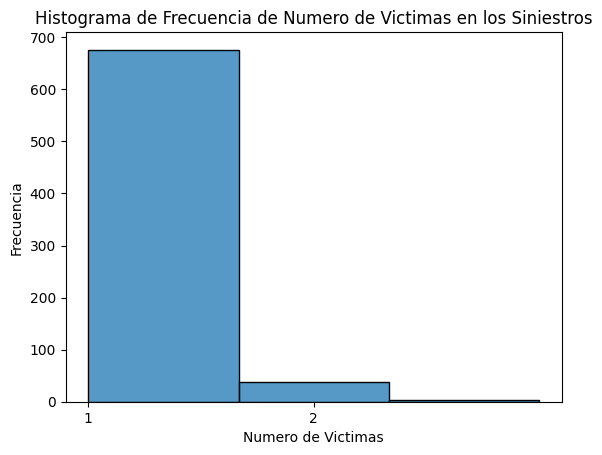

In [56]:
sns.histplot(data=df_merged, x='N_VICTIMAS', bins=3)
plt.title('Histograma de Frecuencia de Numero de Victimas en los Siniestros')
plt.xlabel('Numero de Victimas')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje x cada 2 unidades
plt.xticks(range(1, 3, 1))

plt.show()

#### Analisis de datos en la columna AAAA (Año de Siniestro)

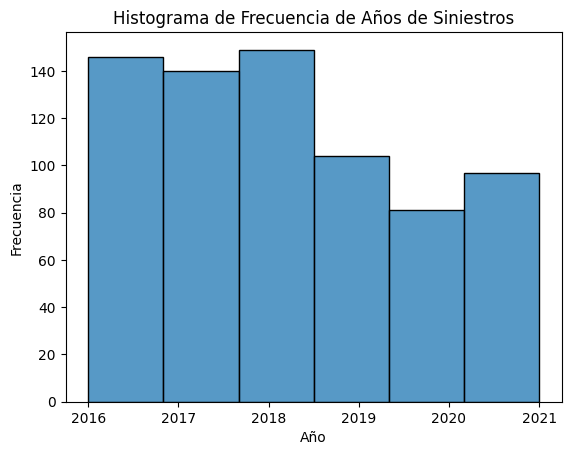

In [57]:
sns.histplot(data=df_merged, x='AAAA', bins=6)
plt.title('Histograma de Frecuencia de Años de Siniestros')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje x cada 2 unidades
#plt.xticks(range(2016, 2022, 1))

plt.show()

In [59]:
print(df_merged['AAAA'].value_counts())

AAAA
2018    149
2016    146
2017    140
2019    104
2021     97
2020     81
Name: count, dtype: int64


### Comentario:

- Se observa que año con mayor cantidad de siniestros fue el año 2018, posteriormente la cantidad ha venido disminuyendo
- Se observa que el año 2021 hubo un incremento en el numero de siniestros de 81 a 97 (20% de incremento)

#### Analisis de datos en la columna MM (Mes del Siniestro)

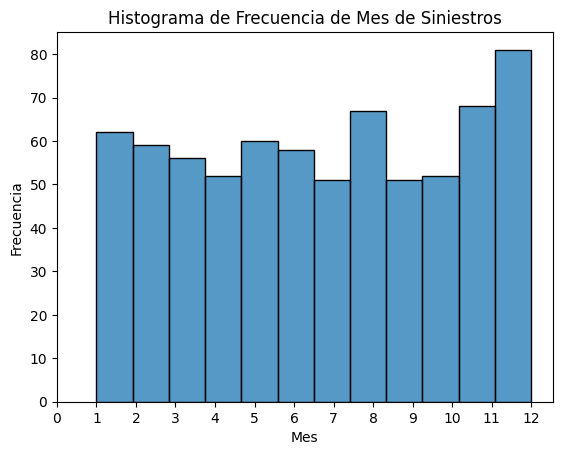

In [60]:
sns.histplot(data=df_merged, x='MM', bins=12)
plt.title('Histograma de Frecuencia de Mes de Siniestros')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje x cada 2 unidades
plt.xticks(range(0, 13, 1))

plt.show()

In [61]:
print(df_merged['MM'].value_counts())

MM
12    81
11    68
8     67
1     62
5     60
2     59
6     58
3     56
4     52
10    52
7     51
9     51
Name: count, dtype: int64


### Comentario:

- Se observa que el mes con mayor cantidad de siniestros es el mes de 12: Diciembre, con 79 siniestros, 18% superior que el mes anterior
- Seguido de los meses 11 (Noviembre, con 67 siniestros) y 8 (Agosto, con 67 siniestros) 

#### Analisis de datos en la columna DD (Dia de Siniestro)

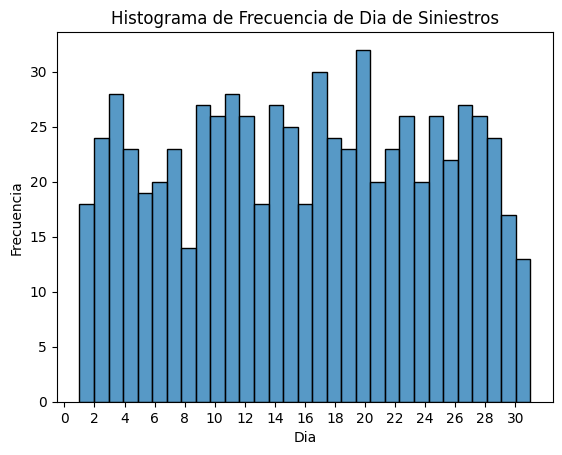

In [62]:
sns.histplot(data=df_merged, x='DD', bins=31)
plt.title('Histograma de Frecuencia de Dia de Siniestros')
plt.xlabel('Dia')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje x cada 2 unidades
plt.xticks(range(0, 32, 2))

plt.show()

In [63]:
print(df_merged['DD'].value_counts())

DD
20    32
17    30
3     28
11    28
9     27
27    27
14    27
10    26
25    26
23    26
12    26
28    26
15    25
18    24
2     24
29    24
4     23
22    23
7     23
19    23
26    22
6     20
24    20
21    20
5     19
16    18
13    18
1     18
30    17
8     14
31    13
Name: count, dtype: int64


#### Comentario:

- Se observa que el dia con mayor cantidad de siniestros es el dia 20 (con 17 siniestros) seguido de los dias 17 (19 siniestros) y 3 (18 siniestros)  
- No se observa inicialmente algun patron o tendencia que sea relevante para el analisis

#### Analisis de datos en la columna DIA_SEMANA (dia de la semana en la que ocurrieron los siniestros)

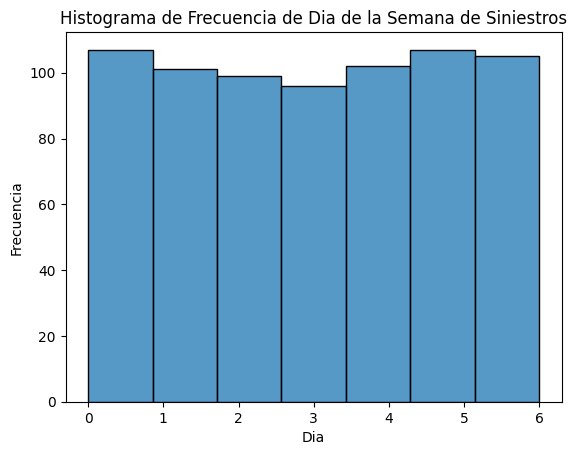

In [64]:
sns.histplot(data=df_merged, x='DIA_SEMANA', bins=7)
plt.title('Histograma de Frecuencia de Dia de la Semana de Siniestros')
plt.xlabel('Dia')
plt.ylabel('Frecuencia')

# Ajustar las etiquetas del eje x cada 2 unidades
plt.xticks(range(0, 7, 1))

plt.show()


In [65]:
print(df_merged['DIA_SEMANA'].value_counts())

DIA_SEMANA
5    107
0    107
6    105
4    102
1    101
2     99
3     96
Name: count, dtype: int64


#### Comentario:

- Se observa que los dia de la semana con mayor cantidad de siniestros son los dias 5 (sabado: 107 siniestros), 6 (domingo: 103 siniestros) y 0 (lunes: 107 siniestros) 

#### Analisis de datos en la columna LUGAR_DEL_HECHO

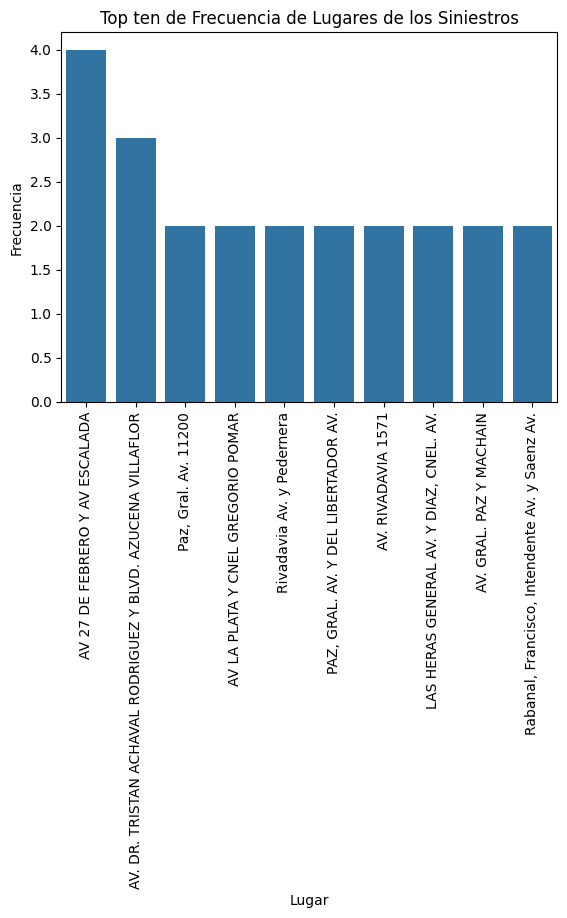

In [66]:
# Se calculan las frecuencias de forma ordenada y se toman las 10 mas frecuentes
lugar_del_hecho = df_merged['LUGAR_DEL_HECHO'].value_counts().head(10)

sns.barplot(data=lugar_del_hecho)
plt.title('Top ten de Frecuencia de Lugares de los Siniestros')
plt.xlabel('Lugar')
plt.ylabel('Frecuencia')
#plt.xticks(range(0, 10, 1))
plt.xticks(rotation=90)
plt.show()


In [67]:
print(df_merged['LUGAR_DEL_HECHO'].value_counts().head(10))

LUGAR_DEL_HECHO
AV 27 DE FEBRERO Y AV ESCALADA                                 4
AV. DR. TRISTAN ACHAVAL RODRIGUEZ Y BLVD. AZUCENA VILLAFLOR    3
Paz, Gral. Av. 11200                                           2
AV LA PLATA Y CNEL GREGORIO POMAR                              2
Rivadavia Av. y Pedernera                                      2
PAZ, GRAL. AV. Y DEL LIBERTADOR AV.                            2
AV. RIVADAVIA 1571                                             2
LAS HERAS GENERAL AV. Y DIAZ, CNEL. AV.                        2
AV. GRAL. PAZ Y MACHAIN                                        2
Rabanal, Francisco, Intendente Av. y Saenz Av.                 2
Name: count, dtype: int64


#### Comentario:

- El lugar AV 27 DE FEBRERO Y AV ESCALADA es el que se muestra con mas sinisestros (4), aunque no es considerablemente mayor que los demas

#### Analisis de datos en la columna TIPO_DE_CALLE

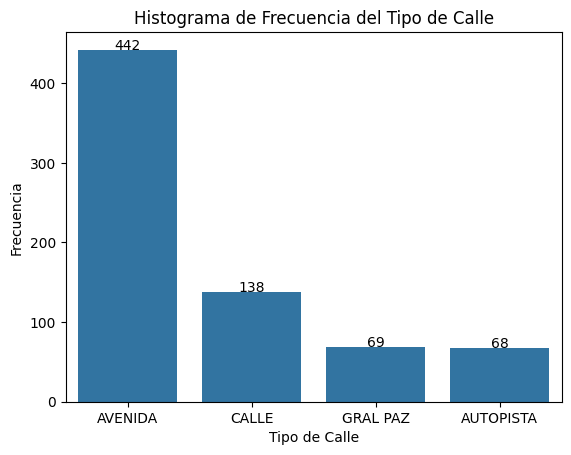

In [68]:
# Se calculan las frecuencias
frecuencias = df_merged['TIPO_DE_CALLE'].value_counts()

# Ordenar las categorías por frecuencia de mayor a menor
categorias_ordenadas = frecuencias.index.tolist()

# Crear un DataFrame con las frecuencias ordenadas
df_frecuencias = pd.DataFrame({'TIPO_DE_CALLE': categorias_ordenadas, 'FRECUENCIA': frecuencias[categorias_ordenadas]})

# Crear el gráfico de barra
ax = sns.barplot(data=df_frecuencias, x='TIPO_DE_CALLE', y='FRECUENCIA')

# Agregar anotaciones con los valores de la frecuencia
for index, row in df_frecuencias.iterrows():
    ax.text(row.name, row['FRECUENCIA'], row['FRECUENCIA'], color='black', ha="center")

plt.title('Histograma de Frecuencia del Tipo de Calle')
plt.xlabel('Tipo de Calle')
plt.ylabel('Frecuencia')
plt.show()

In [70]:
print(df_merged['TIPO_DE_CALLE'].value_counts())

TIPO_DE_CALLE
AVENIDA      442
CALLE        138
GRAL PAZ      69
AUTOPISTA     68
Name: count, dtype: int64


#### Comentario:

- El tipo de calle con mayor cantidad de siniestros son las Avenidas con 442 siniestros (frecuencia 3,2 veces mayor que el segundo lugar que es Calle)

#### Analisis de datos en la columna Calle

In [71]:
print(df_merged['Calle'].value_counts().head(10))

Calle
PAZ, GRAL. AV.                                61
RIVADAVIA AV.                                 20
DEL LIBERTADOR AV.                            19
AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI    14
ALBERDI, JUAN BAUTISTA AV.                    13
AUTOPISTA PERITO MORENO                       13
AUTOPISTA 25 DE MAYO                          12
CORRIENTES AV.                                11
SAN MARTIN AV.                                11
CORDOBA AV.                                   10
Name: count, dtype: int64


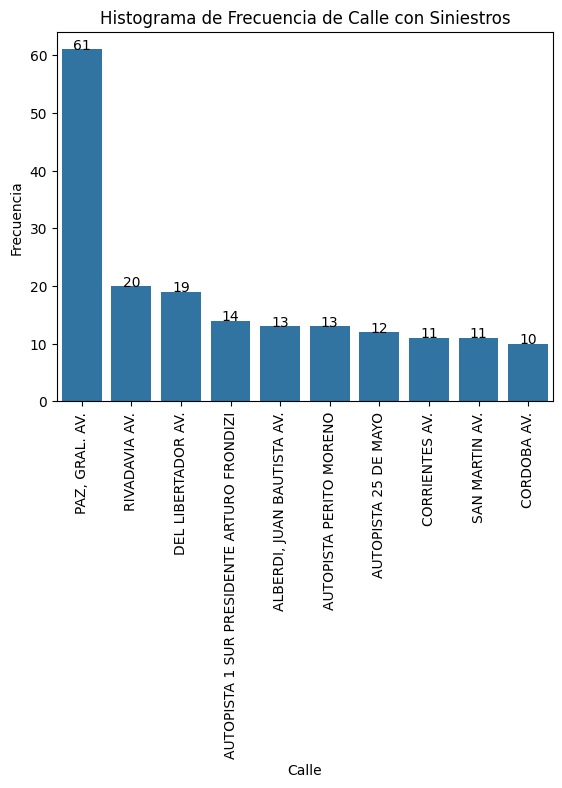

In [72]:
# Se calculan las frecuencias
frecuencias = df_merged['Calle'].value_counts().head(10)

# Ordenar las categorías por frecuencia de mayor a menor
categorias_ordenadas = frecuencias.index.tolist()

# Crear un DataFrame con las frecuencias ordenadas
df_frecuencias = pd.DataFrame({'Calle': categorias_ordenadas, 'FRECUENCIA': frecuencias[categorias_ordenadas]})

# Crear el gráfico de barra
ax = sns.barplot(data=df_frecuencias, x='Calle', y='FRECUENCIA')

# Agregar anotaciones con los valores de la frecuencia
for index, row in df_frecuencias.iterrows():
    ax.text(row.name, row['FRECUENCIA'], row['FRECUENCIA'], color='black', ha="center")

plt.title('Histograma de Frecuencia de Calle con Siniestros')
plt.xlabel('Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

#### Comentario:

- La calle con mayor cantidad de siniestros es PAZ, GRAL con 61 siniestros (frecuencia 3 veces mayor que el segundo lugar que es RIVADAVIA AV.)

In [271]:
print(df_merged.columns)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'DIAS_FALLECIMIENTO', 'DIA_SEMANA'],
      dtype='object')


#### Analisis de datos en la columna Altura

In [73]:
print(df_merged['Altura'].value_counts())

Altura
901.0     2
4100.0    2
4300.0    2
365.0     2
2800.0    2
         ..
5750.0    1
2135.0    1
5400.0    1
2114.0    1
709.0     1
Name: count, Length: 126, dtype: int64


### Comentario:

- No se observa ninguna Altura predominante en la frecuencia de siniestros

#### Analisis de datos en la columna Cruce

In [74]:
print(df_merged['Cruce'].value_counts())

Cruce
PAZ, GRAL. AV.              14
ESCALADA AV.                 9
RIVADAVIA AV.                8
INDEPENDENCIA AV.            7
BALBIN, RICARDO, DR. AV.     6
                            ..
LA RIOJA                     1
TRAFUL                       1
HUMAITA                      1
MANZANARES                   1
HUGO, VICTOR                 1
Name: count, Length: 317, dtype: int64


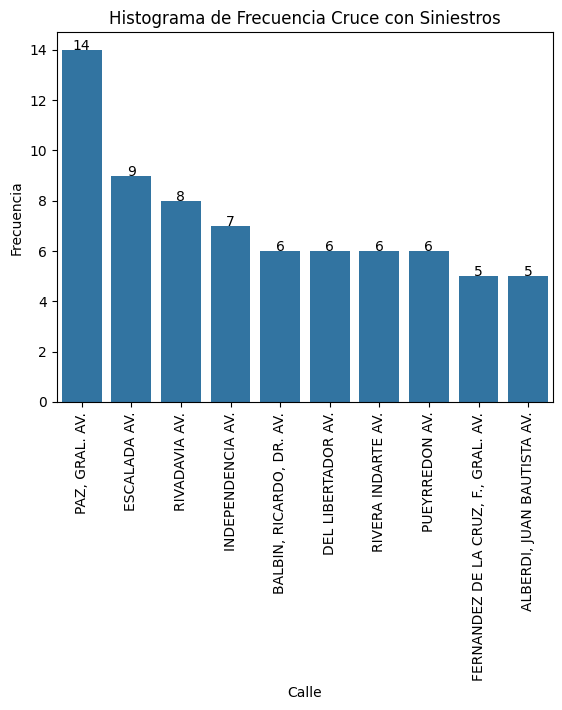

In [75]:
# Se calculan las frecuencias
frecuencias = df_merged['Cruce'].value_counts().head(10)

# Ordenar las categorías por frecuencia de mayor a menor
categorias_ordenadas = frecuencias.index.tolist()

# Crear un DataFrame con las frecuencias ordenadas
df_frecuencias = pd.DataFrame({'Cruce': categorias_ordenadas, 'FRECUENCIA': frecuencias[categorias_ordenadas]})

# Crear el gráfico de barra
ax = sns.barplot(data=df_frecuencias, x='Cruce', y='FRECUENCIA')

# Agregar anotaciones con los valores de la frecuencia
for index, row in df_frecuencias.iterrows():
    ax.text(row.name, row['FRECUENCIA'], row['FRECUENCIA'], color='black', ha="center")

plt.title('Histograma de Frecuencia Cruce con Siniestros')
plt.xlabel('Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

#### Comentario:
- El cruce con mayor cantidad de siniestros es PAZ, GRAL con 14 siniestros (frecuencia 1.5 veces mayor que el segundo lugar que es ESCALADA AV. con 9 siniestros.)

#### Analisis de datos de la columna Dirección Normalizada

In [278]:
print(df_merged['Dirección Normalizada'].value_counts())

Dirección Normalizada
27 DE FEBRERO AV. Y ESCALADA AV.                            5
PAZ, GRAL. AV. Y BALBIN, RICARDO, DR. AV.                   4
PAZ, GRAL. AV. Y DEL LIBERTADOR AV.                         4
CASTILLO, RAMON S., PRES. AV. Y CALLE 12 (NO OFICIAL)       3
ALCORTA, AMANCIO AV. Y BONAVENA, OSCAR NATALIO              3
                                                           ..
BARCO CENTENERA DEL Y RABANAL, FRANCISCO, INTENDENTE AV.    1
MOSCONI GENERAL AV. Y SAN NICOLAS                           1
LAFUENTE AV. Y PERON, EVA AV.                               1
ROCA, CNEL. AV. Y ESCALADA AV.                              1
PADRE CARLOS MUGICA 709                                     1
Name: count, Length: 633, dtype: int64


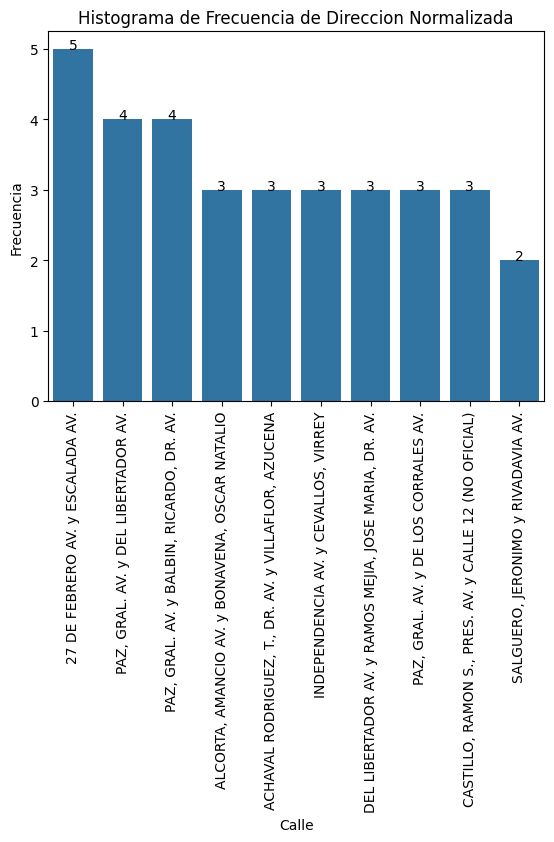

In [76]:
# Se calculan las frecuencias
frecuencias = df_merged['Dirección Normalizada'].value_counts().head(10)

# Ordenar las categorías por frecuencia de mayor a menor
categorias_ordenadas = frecuencias.index.tolist()

# Crear un DataFrame con las frecuencias ordenadas
df_frecuencias = pd.DataFrame({'Dirección Normalizada': categorias_ordenadas, 'FRECUENCIA': frecuencias[categorias_ordenadas]})

# Crear el gráfico de barra
ax = sns.barplot(data=df_frecuencias, x='Dirección Normalizada', y='FRECUENCIA')

# Agregar anotaciones con los valores de la frecuencia
for index, row in df_frecuencias.iterrows():
    ax.text(row.name, row['FRECUENCIA'], row['FRECUENCIA'], color='black', ha="center")

plt.title('Histograma de Frecuencia de Direccion Normalizada')
plt.xlabel('Calle')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

#### Comentario:
- La Direccion Normalizda con mayor cantidad de siniestros es 27 DE FEBRERO AV. Y ESCALADA AV. con 5 siniestros seguida de PAZ, GRAL. AV. Y BALBIN, RICARDO, DR. AV. con 4 y PAZ, GRAL. AV. Y DEL LIBERTADOR AV. con 4. No se observa una tendencia o patron predominante

#### Analisis de datos de la columna COMUNA

In [77]:
print(df_merged['COMUNA'].value_counts())

COMUNA
1     93
4     79
9     75
8     67
7     62
3     46
15    45
13    40
12    39
14    37
11    33
10    30
2     25
6     22
5     22
0      2
Name: count, dtype: int64


In [78]:
# Se asignara el valor de Comuna = 1, que es el valor mas frecuente, a las 2 filas que presentan  Comuna = 0
df_merged.loc[df_merged['COMUNA'] == 0, 'COMUNA'] = 1

print(df_merged['COMUNA'].value_counts())

COMUNA
1     95
4     79
9     75
8     67
7     62
3     46
15    45
13    40
12    39
14    37
11    33
10    30
2     25
6     22
5     22
Name: count, dtype: int64


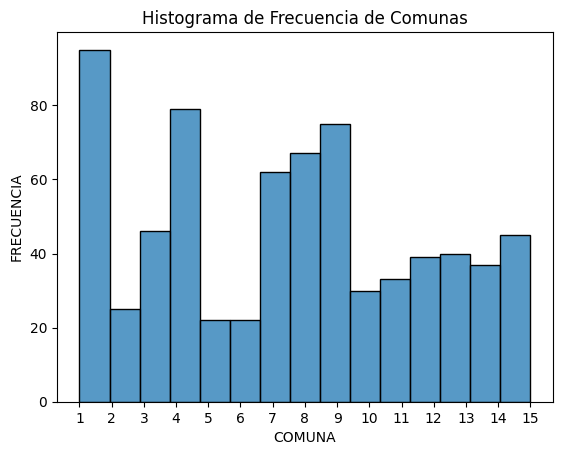

In [79]:
sns.histplot(data=df_merged, x='COMUNA', bins=15)
plt.title('Histograma de Frecuencia de Comunas')
plt.xlabel('COMUNA')
plt.ylabel('FRECUENCIA')
plt.xticks(range(1, 16, 1))
plt.show()


#### Comentario:
- La COMUNA con mas frecuencia de siniestros es la 1 con 92 siniestros seguida de las COMUNAS 4 (con 77 siniestros) y 9 (con 75 siniestros)

#### Analisis de datos de la columna PARTICIPANTE

In [80]:
print(df_merged['PARTICIPANTES'].value_counts())

PARTICIPANTES
PEATON-PASAJEROS       105
MOTO-AUTO               84
MOTO-CARGAS             80
PEATON-AUTO             79
MOTO-PASAJEROS          50
MOTO-OBJETO FIJO        40
PEATON-CARGAS           38
AUTO-AUTO               33
PEATON-MOTO             30
AUTO-OBJETO FIJO        28
MOTO-MOTO               25
MULTIPLE                17
AUTO-CARGAS             15
AUTO-PASAJEROS          10
BICICLETA-CARGAS        10
MOTO-SD                  9
BICICLETA-PASAJEROS      8
BICICLETA-AUTO           8
SD-SD                    5
PEATON-BICICLETA         5
CARGAS-CARGAS            4
PEATON-SD                4
AUTO-SD                  4
PASAJEROS-PASAJEROS      3
SD-AUTO                  2
MOVIL-CARGAS             2
MOTO-BICICLETA           2
MOTO-OTRO                2
PEATON_MOTO-MOTO         2
MOTO-MOVIL               2
BICICLETA-OTRO           1
AUTO-MOVIL               1
BICICLETA-TREN           1
CARGAS-PASAJEROS         1
CARGAS-AUTO              1
PASAJEROS-AUTO           1
SD-MOTO       

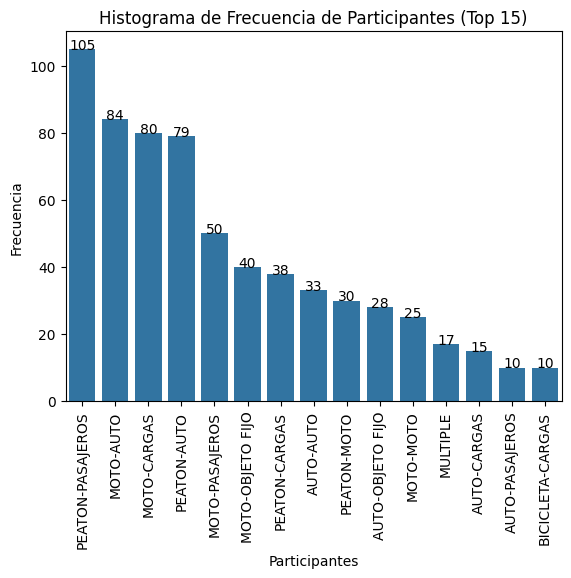

In [81]:
# Se calculan las frecuencias
frecuencias = df_merged['PARTICIPANTES'].value_counts().head(15)

# Ordenar las categorías por frecuencia de mayor a menor
categorias_ordenadas = frecuencias.index.tolist()

# Crear un DataFrame con las frecuencias ordenadas
df_frecuencias = pd.DataFrame({'PARTICIPANTES': categorias_ordenadas, 'FRECUENCIA': frecuencias[categorias_ordenadas]})

# Crear el gráfico de barra
ax = sns.barplot(data=df_frecuencias, x='PARTICIPANTES', y='FRECUENCIA')

# Agregar anotaciones con los valores de la frecuencia
for index, row in df_frecuencias.iterrows():
    ax.text(row.name, row['FRECUENCIA'], row['FRECUENCIA'], color='black', ha="center")

plt.title('Histograma de Frecuencia de Participantes (Top 15)')
plt.xlabel('Participantes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

#### Comentario:
- El tipo de Participante con mayor cantidad de siniestros es PEATON-PASAJEROS con 105 siniestros, seguido de MOTO-AUTO (84), MOTO-CARGAS (79) y PEATON-AUTO (79)   

#### Analisis de datos de la columna VICTIMA

In [82]:
print(df_merged['VICTIMA'].value_counts())

VICTIMA
MOTO           302
PEATON         266
AUTO            92
BICICLETA       29
CARGAS           7
PASAJEROS        5
MOVIL            3
OBJETO FIJO      2
PEATON_MOTO      2
Name: count, dtype: int64


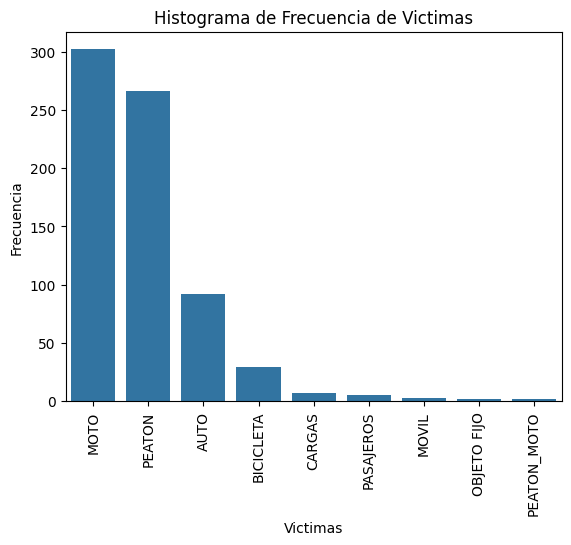

In [83]:
# Obtener las frecuencias de cada valor en la columna 'VICTIMA'
frecuencias_victima = df_merged['VICTIMA'].value_counts()

# Obtener las 10 categorías más frecuentes
categorias_ordenadas = frecuencias_victima.head(10).index

# Crear un DataFrame con las frecuencias ordenadas
df_frecuencias_victima = pd.DataFrame({'VICTIMA': categorias_ordenadas, 'FRECUENCIA': frecuencias_victima[categorias_ordenadas]})

# Crear el gráfico de barras con seaborn
sns.barplot(data=df_frecuencias_victima, x='VICTIMA', y='FRECUENCIA')

plt.title('Histograma de Frecuencia de Victimas')
plt.xlabel('Victimas')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

#### Comentario:

- La mayor frecuencias de Victimas corresponden a MOTO, con 302, seguida de PEATON con 265 y AUTO con 92

#### Analisis de datos de la columna ACUSADO

In [85]:
print(df_merged['ACUSADO'].value_counts())

ACUSADO
AUTO           210
PASAJEROS      178
CARGAS         150
OBJETO FIJO     67
MOTO            58
MULTIPLE        17
BICICLETA        7
OTRO             6
TREN             1
Name: count, dtype: int64


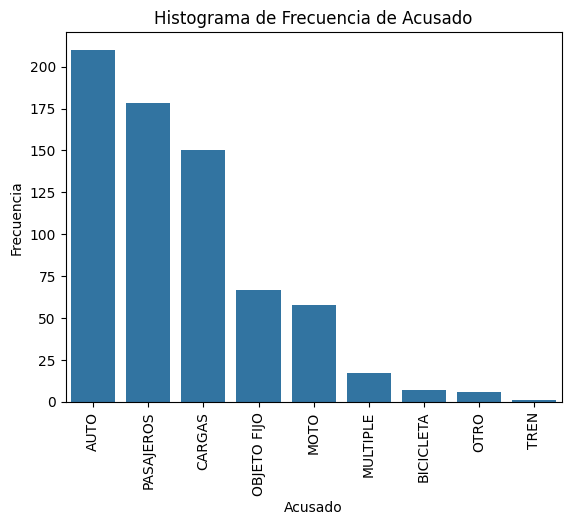

In [86]:
# Obtener las frecuencias de cada valor en la columna 'VICTIMA'
frecuencias_victima = df_merged['ACUSADO'].value_counts()

# Obtener las 10 categorías más frecuentes
categorias_ordenadas = frecuencias_victima.head(10).index

# Crear un DataFrame con las frecuencias ordenadas
df_frecuencias_victima = pd.DataFrame({'ACUSADO': categorias_ordenadas, 'FRECUENCIA': frecuencias_victima[categorias_ordenadas]})

# Crear el gráfico de barras con seaborn
sns.barplot(data=df_frecuencias_victima, x='ACUSADO', y='FRECUENCIA')

plt.title('Histograma de Frecuencia de Acusado')
plt.xlabel('Acusado')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()

#### Comentario:

- El ACUSADO con mayor frecuencias corresponden AUTO con 210, seguido de PASAJEROS con 178 y CARGAS con 150

#### Validacion de rango de coordenadas
- Se observa que las coordenadas estan dentro del rango esperado y que hay solo 13 siniestros sin inidcacion de coordenadas

In [73]:
print(df_merged['pos x'].value_counts())

pos x
.                     13
-58.44451316           5
-58.49491054           4
-58.50877521           4
-58.46743471           4
-58.50073810           4
-58.41657793           4
-58.38896772           3
-58.35881506           3
-58.48727942           3
-58.46749188           3
-58.37533517           3
-58.40623949           3
-58.47064556           3
-58.37709334           3
-58.52340614           3
-58.39118948           3
-58.46963952           3
-58.47976785           3
-58.38526125           3
-58.52932872           2
-58.38268809           2
-58.51452347           2
-58.42668489           2
-58.42779702           2
-58.41036975           2
-58.44927253           2
-58.38872177           2
-58.49603546           2
-58.52927982           2
-58.47297505           2
-58.41595919           2
-58.52572109           2
-58.40184094           2
-58.37864583           2
-58.45962210           2
-58.51232237           2
-58.41842777           2
-58.41971993           2
-58.48003734       

In [74]:
print(df_merged['pos y'].value_counts())

pos y
.                     13
-34.68475866           5
-34.54795581           4
-34.66977709           4
-34.53476874           4
-34.54979510           4
-34.65476216           4
-34.61799615           3
-34.61113641           3
-34.63652467           3
-34.63551751           3
-34.59276462           3
-34.65076549           3
-34.69843756           3
-34.64035082           3
-34.59798754           3
-34.62704273           3
-34.63070603           3
-34.69153196           3
-34.57805810           3
-34.65014993           2
-34.62282019           2
-34.58159762           2
-34.56961468           2
-34.62207347           2
-34.62477021           2
-34.54048625           2
-34.60885045           2
-34.64564271           2
-34.63931752           2
-34.66245085           2
-34.62743346           2
-34.62125906           2
-34.64546845           2
-34.62907067           2
-34.62245140           2
-34.65903530           2
-34.64979057           2
-34.61112240           2
-34.68148508       

#### Analisis de Correlacion

In [100]:
print(df_merged_numerico.head(1))


          ID       FECHA  N_VICTIMAS  AAAA  MM  DD  HH  COMUNA  EDAD  \
0  2016-0001  2016-01-01           1  2016   1   1   4       8    19   

   DIAS_FALLECIMIENTO  
0                 0.0  


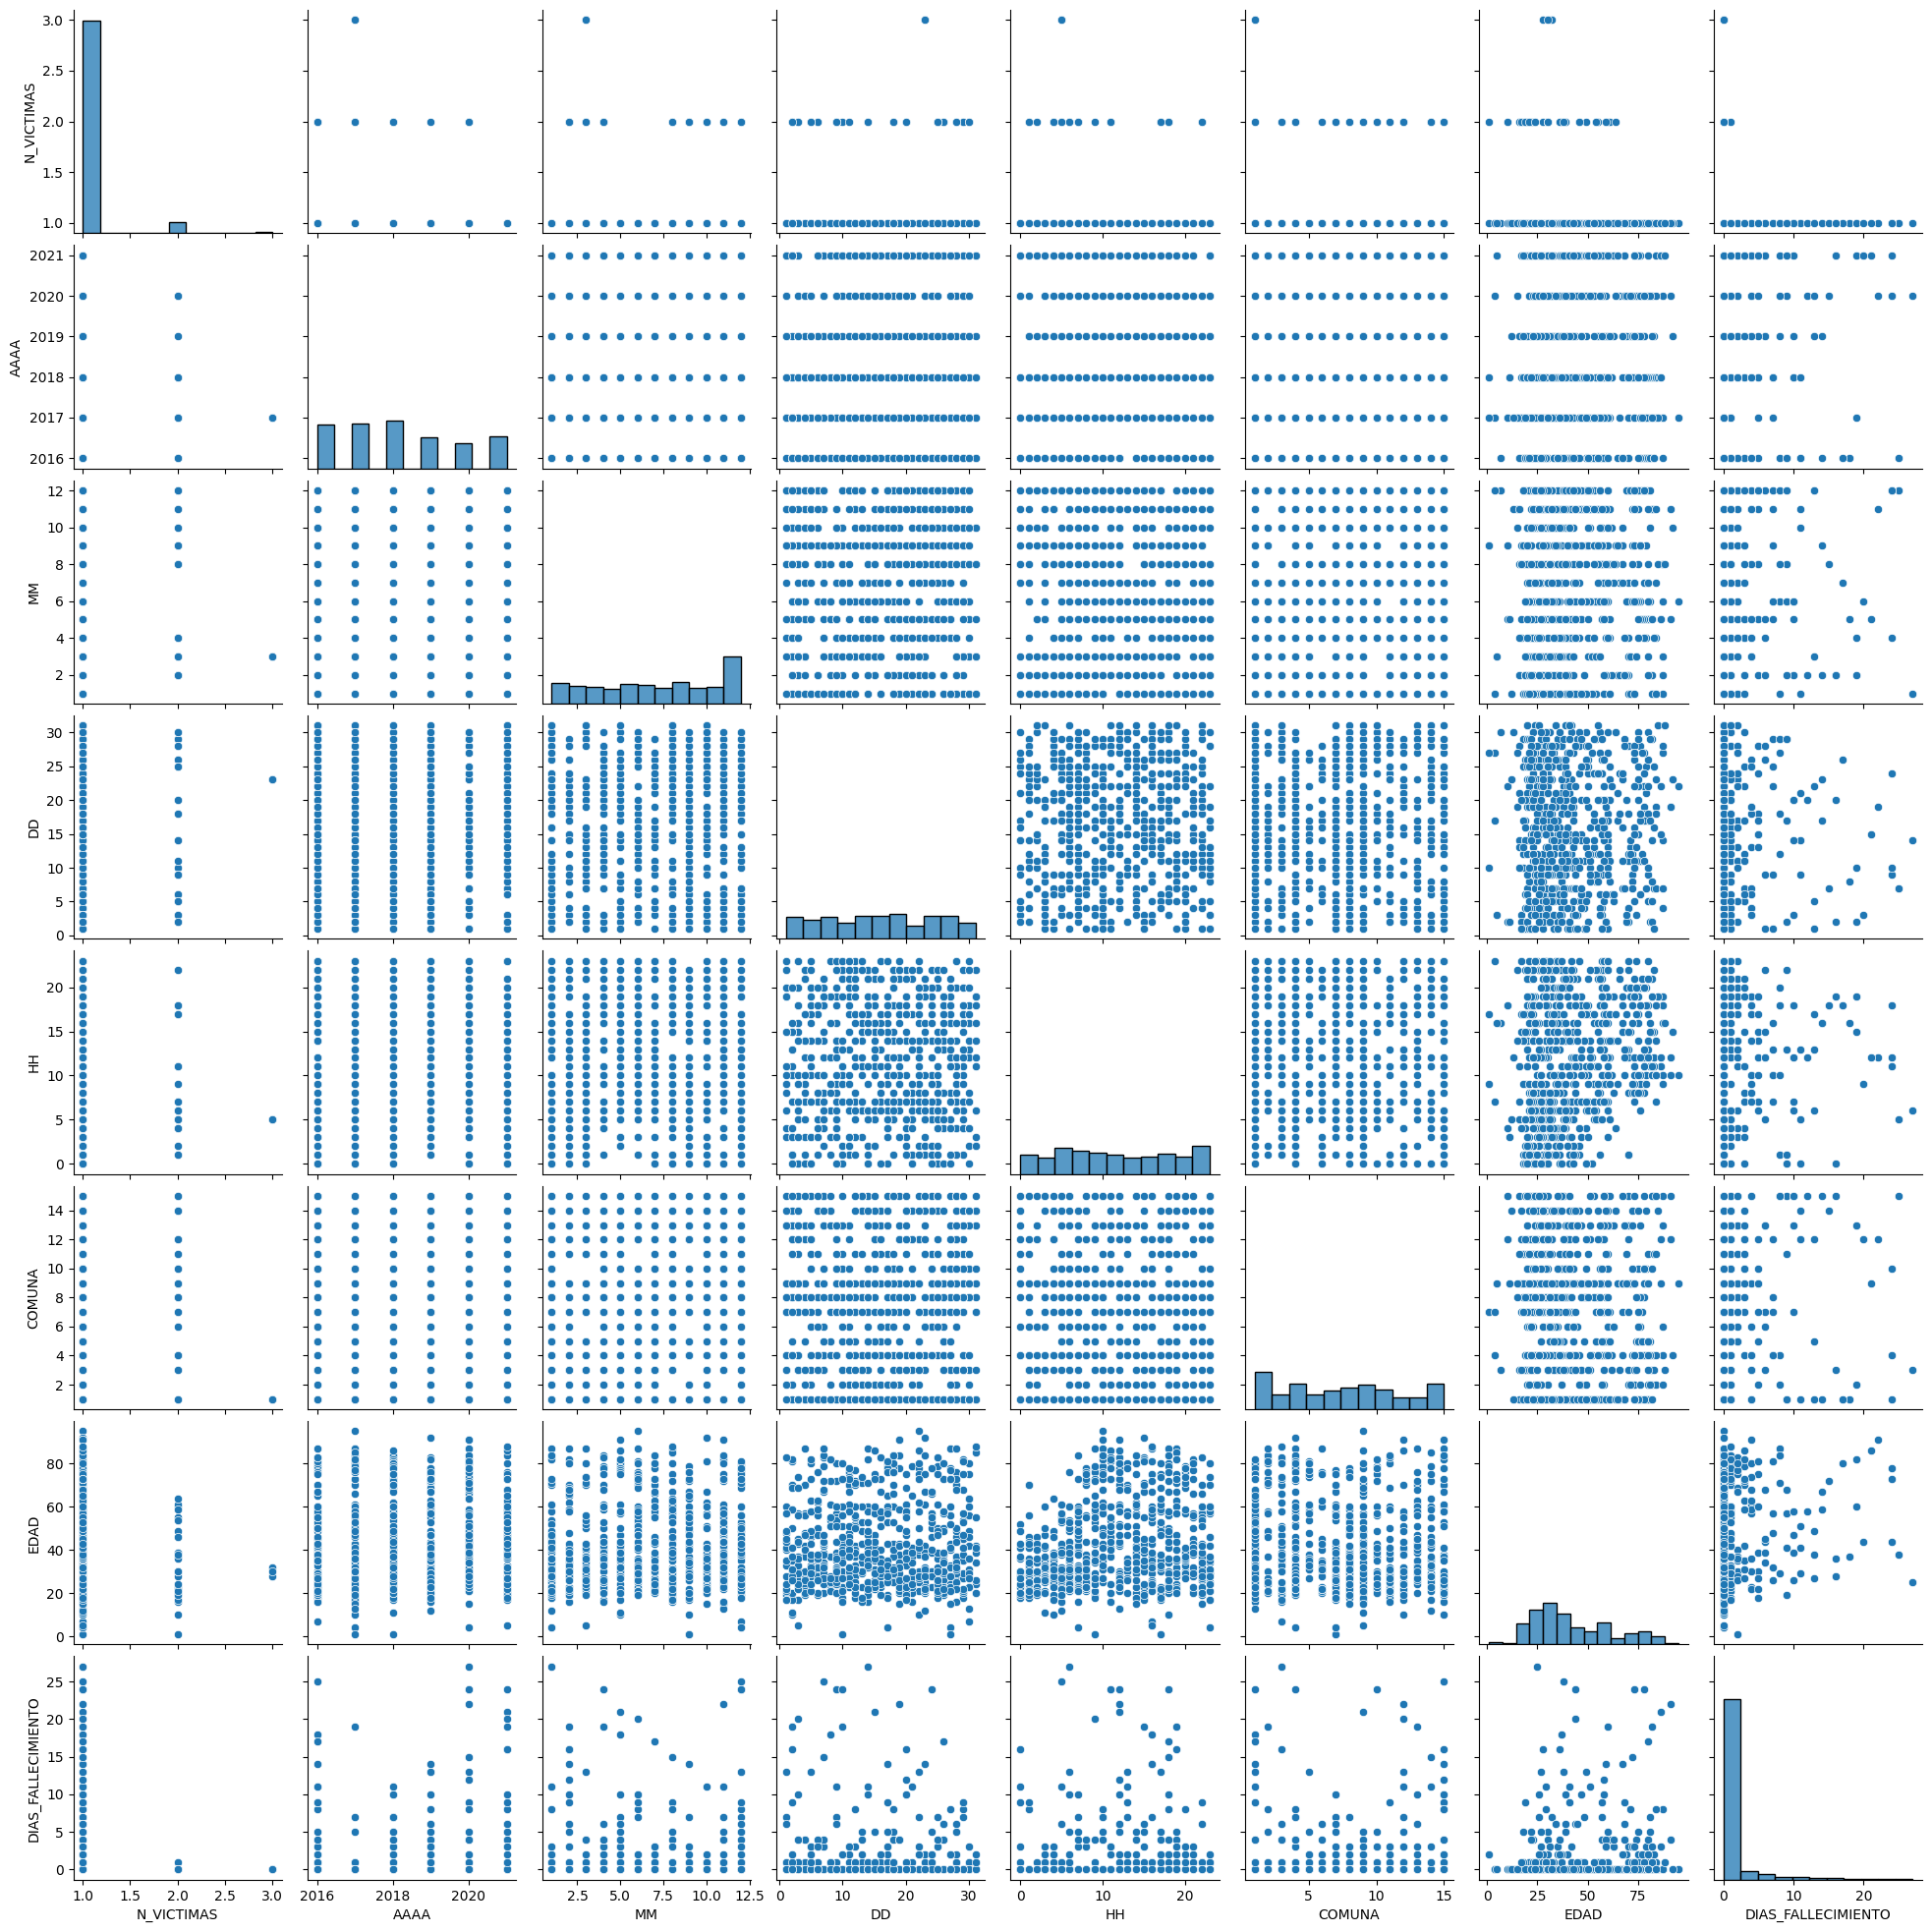

In [314]:
# Se realiza el analisis inicialmente solo con las columans numericas
sns.pairplot(data=df_merged_numerico)

#### Comentario:

- Inicialmente no se observa una correlacion evidente entre las variables numericas del dataframe. Se analizara con mas detalle correlaciones entre las distintas variables en la aplicacion PowerBI

#### Se realiza copia del archivo inical resultante del EDA con todas las columnas generadas

In [101]:
df_merged.to_excel('./dataset/df_merged_eda_all.xlsx', index=False)

#### Se eliminan las columnas no requeridas para el analisis posterior en PowerBi y se guarda  del archivo

In [102]:
print(df_merged.columns)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'DIAS_FALLECIMIENTO', 'DIA_SEMANA', 'SEXO_MARK',
       'SEXO_IMPUTADO', 'EDAD_MARK', 'EDAD_IMPUTADA'],
      dtype='object')


In [109]:
df_merged['EDAD'] = df_merged['EDAD_IMPUTADA']
df_merged['SEXO'] = df_merged['SEXO_IMPUTADO']


In [112]:
columnas_a_eliminar = ['SEXO_MARK', 'SEXO_IMPUTADO', 'EDAD_MARK', 'EDAD_IMPUTADA']

df_merged_eda=df_merged.drop(columnas_a_eliminar, axis=1)

print(df_merged_eda.columns)

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'ROL', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'DIAS_FALLECIMIENTO', 'DIA_SEMANA'],
      dtype='object')


In [114]:
df_merged_eda.to_excel('./dataset/df_merged_eda.xlsx', index=False)